<a href="https://colab.research.google.com/github/qiuzhaoyu/Grounding-DINO-Colab-Fixed/blob/main/Grounding_Dino_Real_work_colab_20251229.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Intitial setup

In [1]:
import os
HOME = os.getcwd()
print(HOME)
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git

/content
/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Total 463 (delta 0), reused 0 (delta 0), pack-reused 463 (from 1)
Receiving objects: 100% (463/463), 12.91 MiB | 30.81 MiB/s, done.
Resolving deltas: 100% (220/220), done.


In [2]:
file_path = "/content/GroundingDINO/groundingdino/models/GroundingDINO/csrc/MsDeformAttn/ms_deform_attn_cuda.cu"

with open(file_path, 'r') as f:
    lines = f.readlines()

# 目标行号（Python 索引从 0 开始）
targets = [64, 134]

for idx in targets:
    if idx < len(lines):
        # 仅替换目标行中的 value.type()
        lines[idx] = lines[idx].replace("value.type()", "value.scalar_type()")
        print(f"已修改第 {idx + 1} 行: {lines[idx].strip()}")

with open(file_path, 'w') as f:
    f.writelines(lines)

print("\n指定行修改完成。")

已修改第 65 行: AT_DISPATCH_FLOATING_TYPES(value.scalar_type(), "ms_deform_attn_forward_cuda", ([&] {
已修改第 135 行: AT_DISPATCH_FLOATING_TYPES(value.scalar_type(), "ms_deform_attn_backward_cuda", ([&] {

指定行修改完成。


In [3]:
%cd {HOME}/GroundingDINO
!pip install datumaro
!pip install -r requirements.txt
!pip install -q -e .

/content/GroundingDINO
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.7/336.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

Verify that configuration is correct

In [4]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO weights

In [5]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))


/content
/content/weights
/content/weights/groundingdino_swint_ogc.pth ; exist: True


##Load Grounding DINO model

In [6]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

##Using the model

We will first perform inference on the downloaded images, then save the annotations to be exported in COCO format. Tweak the text prompts to get to your desired output.

✅ 图片加载成功！尺寸: (600, 800, 3)


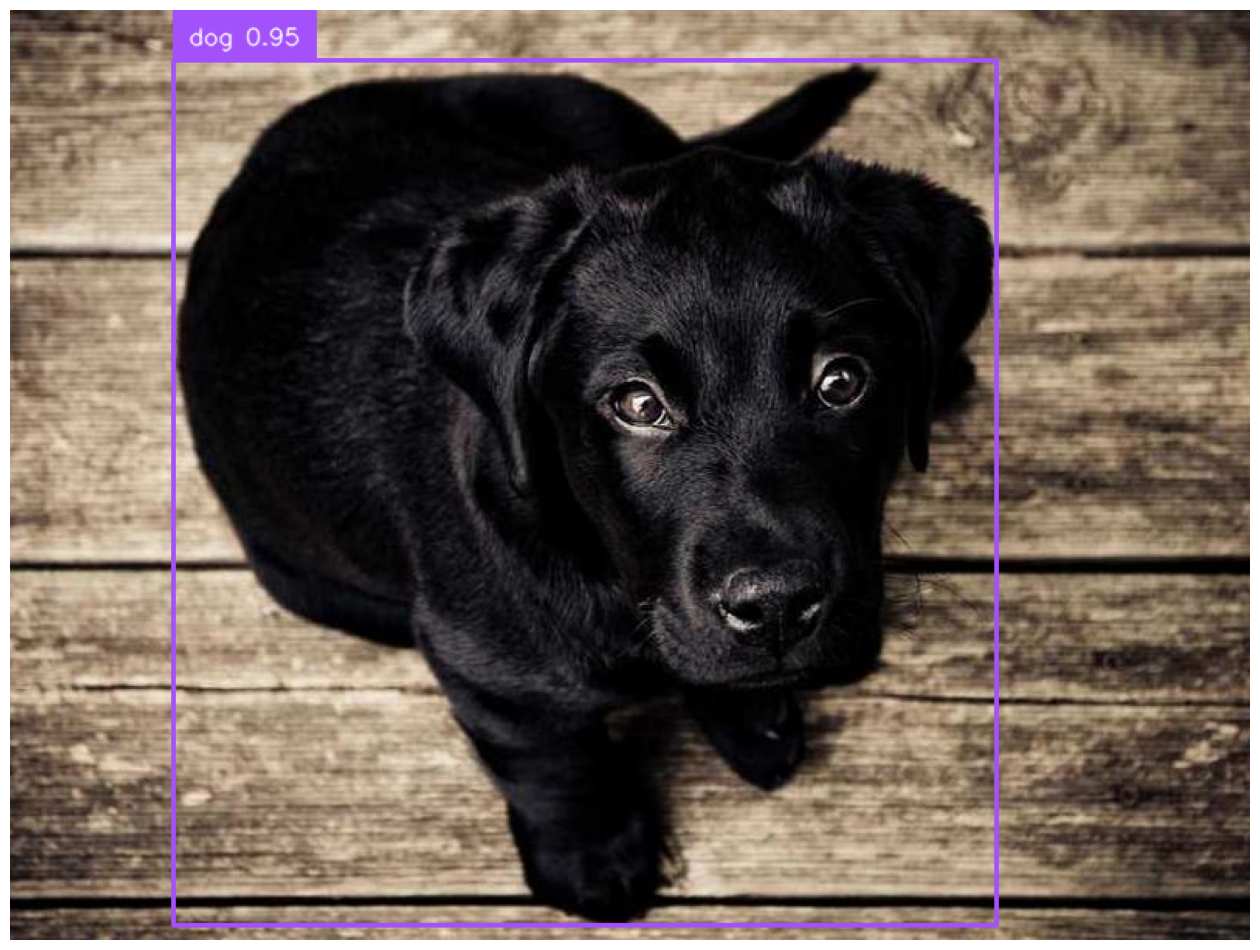

检测到物体: ['dog']


In [7]:
import requests
from PIL import Image
import numpy as np
import torch
import sys
import supervision as sv
from io import BytesIO
from datumaro import Bbox, Dataset, DatasetItem, Image as DImage

# 1. 使用 Picsum 提供的固定 ID 测试图 (这是一张狗的图片)
IMAGE_URL = "https://picsum.photos/id/237/800/600"
TEXT_PROMPT = "dog"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

# 联网获取图片
try:
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(IMAGE_URL, headers=headers, timeout=15)

    if response.status_code != 200:
        print(f"❌ 请求失败，状态码: {response.status_code}")
        sys.exit("停止运行：请检查网络或更换其他 CDN 图片链接。")

    image_pil = Image.open(BytesIO(response.content)).convert("RGB")
    image_source = np.array(image_pil)
    print(f"✅ 图片加载成功！尺寸: {image_source.shape}")
except Exception as e:
    sys.exit(f"❌ 发生异常: {e}")

# 2. 预处理
import groundingdino.datasets.transforms as T
transform = T.Compose([
    T.RandomResize([800], max_size=1333),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])
image_transformed, _ = transform(image_pil, None)

# 3. 推理预测
# Grounding DINO 利用跨模态融合机制将文本指令转化为视觉搜索信号
boxes, logits, phrases = predict(
    model=model,
    image=image_transformed,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

# 4. 可视化
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

# 5. Datumaro 封装
h, w, _ = image_source.shape
annotations = []
for box in boxes:
    # Grounding DINO 返回归一化的 $[cx, cy, w, h]$ 格式
    result = box * torch.Tensor([w, h, w, h])
    cx, cy, bw, bh = result.tolist()
    # 转换为 Datumaro 要求的左上角坐标格式 $[x_{min}, y_{min}, w, h]$
    annotations.append(Bbox(cx - bw/2, cy - bh/2, bw, bh, label=0))

dataset_item = DatasetItem(
    id="picsum_test",
    media=DImage.from_numpy(data=image_source),
    annotations=annotations
)

dataset = Dataset.from_iterable([dataset_item], categories=[TEXT_PROMPT])
print(f"检测到物体: {phrases}")

Export from datumaro

In [8]:
dataset.export("./coco_export.json",format="coco")

You may now download the exported COCO file for training, or run a validation workflow to refine the accuracy of the annotations.